## Classifiers Comparision

In this, I compare the classifiers: K-Nearest Neighbors, Logistic Regression, Decision Trees, and Support Vector Machines to predict the outcome of a bank promotions campaign against individuals. 
I compare the classifiers against the following criteria: 
1. Precision
2. Time taken for training, and
3. Interpretability 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

### Data

The dataset is from the <a href="https://archive.ics.uci.edu/ml/datasets/bank+marketing">UCI Machine Learning repository</a>. The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns.

#### Attribute Information:<br/>

Input variables:<br/><br/>
<u>bank client data:</u>
1 - age (numeric)<br/>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br/>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br/>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br/>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br/>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br/>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br/><br/>
<u>related with the last contact of the current campaign:</u><br/>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br/>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br/>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br/>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br/><br/>
<u>other attributes:</u><br/>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br/>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br/>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br/>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br/><br/>
<u>social and economic context attributes</u><br/>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br/>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br/>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br/>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br/>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br/><br/><br/>

<u>Output variable (desired target):</u><br/>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br/>

In [2]:
bank = pd.read_csv('data/bank/bank-full.csv',sep=';', quotechar='"').dropna()
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [53]:
### I use this cell to see the different values for each feature and their individual sizes
feature = 'education'
bank.groupby([feature])[feature].count()

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64

In [10]:
bank.groupby(['education'])['education'].count()

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64

In [5]:
bank.groupby(['job'])['job'].count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64

In [6]:
bank.groupby(['y'])['y'].count()

y
no     39922
yes     5289
Name: y, dtype: int64

In [5]:
bank_additional.groupby(['education'])['education'].count()

education
basic.4y                429
basic.6y                228
basic.9y                574
high.school             921
illiterate                1
professional.course     535
university.degree      1264
unknown                 167
Name: education, dtype: int64

In [6]:
bank_additional.groupby(['y'])['y'].count()

y
no     3668
yes     451
Name: y, dtype: int64

### Data Preparation

In [5]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline

In [8]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Data Transformations
Based on the above analysis, here are the transformations needed: 
1. Job -> OrdinalEncoder in this order: ['entrepreneur', 'management', 'admin.', 'self-employed', 'retired', 'services', 'student', 'technician', 'blue-collar', 'housemaid', 'unemployed', 'unknown']
2. marital -> OnHotEncoder
3. education -> OrdinalEncoder in this order: ['primary', 'secondary', 'tertiary', 'unknown']
4. default -> OneHotEncoder
5. housing -> OneHotEncoder
6. Loan -> OneHotEncoder
7. contact, day, month, pdays -> Dropping these features as they are not important
8. poutcome -> onehotencoder

In [54]:
### Based on the above data analysis, I have settled on the following features to use in my model: 
shortlisted_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'duration','campaign', 'previous', 'poutcome']
X = bank[shortlisted_features]
y = bank['y']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify = y, random_state=22)

In [56]:
### Let us prepare our transformer: 

transformer = make_column_transformer(
    (OneHotEncoder(drop = 'if_binary'), ['marital','default', 'housing', 'loan', 'poutcome']),
    (OrdinalEncoder(categories = [['entrepreneur', 'management', 'admin.', 'self-employed', 'retired', 'services', 'student', 'technician', 'blue-collar', 'housemaid', 'unemployed', 'unknown']]), ['job']),
    (OrdinalEncoder(categories = [['primary', 'secondary', 'tertiary', 'unknown']]), ['education']),
    (StandardScaler(), ['age', 'duration','campaign', 'previous']), #We want the numeric features to be scaled. 
    remainder='passthrough')
transformer.fit_transform(X_train)[:5]

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         7.        ,  1.        , -0.74915284, -0.49043237, -0.24566602,
        -0.29821218],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         5.        ,  1.        , -0.27924703,  0.39483056,  0.07718571,
        -0.29821218],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         6.        ,  2.        , -1.12507749,  2.44879588,  0.72288917,
        -0.29821218],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         8.        ,  1.        , -0.843134  , -0.10604189, -0.24566602,
         0.21439012],
       [ 0.        ,  0.        ,  1

In [12]:
### Function to extract column names since ORdinalEncoder does not provide the get_feature_names_out function
### Source: https://johaupt.github.io/blog/columnTransformer_feature_names.html
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [62]:
#Get the transformed feature names out
tx_feature_names = get_feature_names(transformer)
mapping = { 
    'onehotencoder__x0':'marital',
    'onehotencoder__x1':'default',   
    'onehotencoder__x2':'housing',
    'onehotencoder__x3': 'loan', 
    'onehotencoder__x4':'poutcome', 
    'ordinalencoder-1__':'', 
    'ordinalencoder-2__':'',
    'x0': shortlisted_features[0],
    'x7': shortlisted_features[7],
    'x8': shortlisted_features[8],
    'x9': shortlisted_features[9],
    'standardscaler__': ''
}

for i in range(0,len(tx_feature_names)): 
    for k, v in mapping.items():
        tx_feature_names[i] = tx_feature_names[i].replace(k, v)
        
tx_feature_names 

['marital_divorced',
 'marital_married',
 'marital_single',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'job',
 'education',
 'age',
 'duration',
 'campaign',
 'previous']

### Models 

#### K-Nearest Neighbors

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [66]:
knn_param_grid = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance']
}
knn_pipe = Pipeline([
    ('preprocessor', transformer),
    ('model', KNeighborsClassifier())
])

In [67]:
%%time

knn_grid = GridSearchCV(knn_pipe, param_grid=knn_param_grid, cv=5)
knn_grid.fit(X_train, y_train)

CPU times: total: 3min 31s
Wall time: 1min 23s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['marital',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'poutcome']),
                                                                        ('ordinalencoder-1',
                                                                         OrdinalEncoder(categories=[['entrepreneur',
           

In [68]:
# Print the best parameters and score
print("Best parameters:", knn_grid.best_params_)
print("Best score:", knn_grid.best_score_)

Best parameters: {'model__n_neighbors': 7, 'model__weights': 'uniform'}
Best score: 0.8941131385230653


In [69]:
knn_predictions = knn_grid.predict(X_test)
knn_predictions

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [70]:
pos_label = 'yes'
knn_precision, knn_recall = precision_score(y_test, knn_predictions, pos_label=pos_label), recall_score(y_test, knn_predictions, pos_label=pos_label)
print(f'K Nearest Neighbors (precision, recall): ({knn_precision},{knn_recall})')

K Nearest Neighbors (precision, recall): (0.5739130434782609,0.332703213610586)


Text(0.5, 1.0, 'K Nearest Neighbors Model')

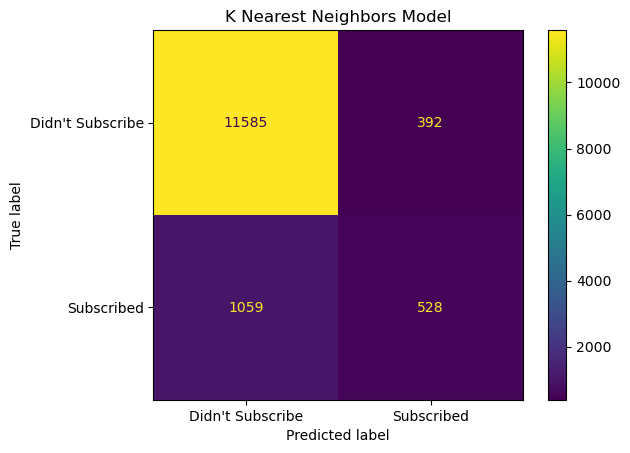

In [71]:
ConfusionMatrixDisplay.from_predictions(
    y_true = y_test, 
    y_pred = knn_predictions, 
    labels = ['no','yes'],
    display_labels=["Didn't Subscribe",'Subscribed']
)
plt.title('K Nearest Neighbors Model')

In [72]:
print(f'y_test(yes, no) :: ({list(y_test).count("yes")},{list(y_test).count("no")})')
print(f'knn_predictions(yes, no) :: ({list(knn_predictions).count("yes")},{list(knn_predictions).count("no")})')

y_test(yes, no) :: (1587,11977)
knn_predictions(yes, no) :: (920,12644)


#### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr_param_grid = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.1, 1, 10, 100]
}

lr_pipe = Pipeline([
    ('preprocessor', transformer),
    ('model', LogisticRegression())
])


In [74]:
%%time
lr_grid = GridSearchCV(lr_pipe, param_grid = lr_param_grid, cv=5)
lr_grid.fit(X_train, y_train)

CPU times: total: 26.6 s
Wall time: 4.53 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['marital',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'poutcome']),
                                                                        ('ordinalencoder-1',
                                                                         OrdinalEncoder(categories=[['entrepreneur',
           

In [75]:
# Print the best parameters and score
print("Best parameters:", lr_grid.best_params_)
print("Best score:", lr_grid.best_score_)

Best parameters: {'model__C': 1, 'model__penalty': 'l2'}
Best score: 0.8998640576478245


In [76]:
# let us get the coefficients of the features used in the best estimator
lr_feature_weights = pd.DataFrame({
    'feature': tx_feature_names,
    'weight': lr_grid.best_estimator_['model'].coef_[0]
})
lr_feature_weights['abs_weight'] = abs(lr_feature_weights['weight'])

lr_feature_weights.sort_values(by=['abs_weight'], ascending=False)

,feature,weight,abs_weight
8,poutcome_success,1.737990,1.737990
13,duration,1.025001,1.025001
4,housing_yes,-1.019323,1.019323
9,poutcome_unknown,-1.003376,1.003376
5,loan_yes,-0.584818,0.584818
6,poutcome_failure,-0.511360,0.511360
3,default_yes,-0.411717,0.411717
14,campaign,-0.340072,0.340072
2,marital_single,0.226392,0.226392
7,poutcome_other,-0.222784,0.222784


In [77]:
lr_predictions = lr_grid.predict(X_test)
lr_predictions

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [78]:
pos_label = 'yes'
lr_precision, lr_recall = precision_score(y_test, lr_predictions, pos_label=pos_label), recall_score(y_test, lr_predictions, pos_label=pos_label)
print(f'Logistic Regression (precision, recall): ({lr_precision},{lr_recall})')

Logistic Regression (precision, recall): (0.6467532467532467,0.31379962192816635)


Text(0.5, 1.0, 'Logistic Regression Model')

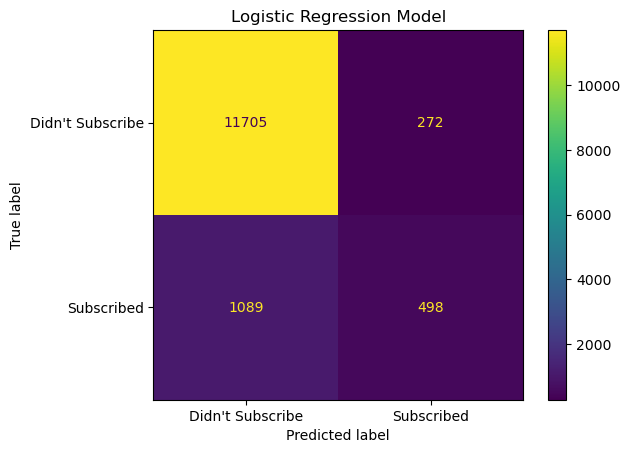

In [79]:
ConfusionMatrixDisplay.from_predictions(
    y_true = y_test, 
    y_pred = lr_predictions, 
    labels = ['no','yes'],
    display_labels=["Didn't Subscribe",'Subscribed']
)
plt.title('Logistic Regression Model')

#### Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt_param_grid =  {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [2, 4, 6, 8, 10],
    'model__min_samples_split': [2, 4, 6, 8, 10],
    'model__min_samples_leaf': [1, 2, 3, 4, 5]
}

dt_pipe = Pipeline([
    ('preprocessor', transformer),
    ('model', DecisionTreeClassifier())
])

In [82]:
%%time

dt_grid = GridSearchCV(dt_pipe, param_grid=dt_param_grid, cv=5)
dt_grid.fit(X_train, y_train)

CPU times: total: 2min 9s
Wall time: 2min 11s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['marital',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'poutcome']),
                                                                        ('ordinalencoder-1',
                                                                         OrdinalEncoder(categories=[['entrepreneur',
           

In [51]:
# Print the best parameters and score
print("Best parameters:", dt_grid.best_params_)
print("Best score:", dt_grid.best_score_)

Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 6, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}
Best score: 0.9008752059590786


In [52]:
dt_predictions = dt_grid.predict(X_test)
dt_predictions

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [86]:
pos_label = 'yes'
dt_precision, dt_recall = precision_score(y_test, dt_predictions, pos_label=pos_label), recall_score(y_test, dt_predictions, pos_label=pos_label)
print(f'Decision Tree (precision, recall): ({dt_precision},{dt_recall})')

Decision Tree (precision, recall): (0.6441102756892231,0.3238815374921235)


Text(0.5, 1.0, 'Decision Tree Model')

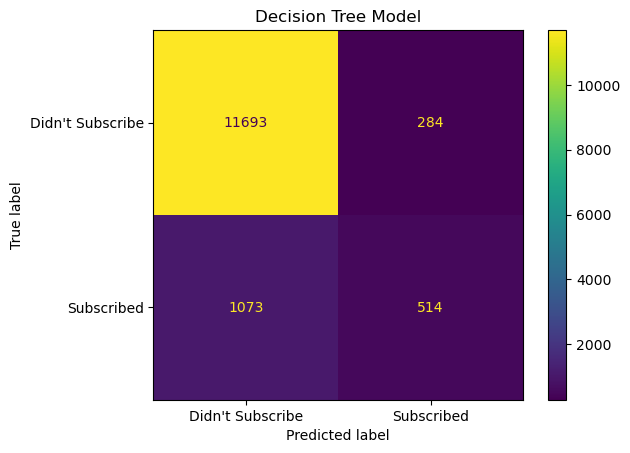

In [55]:
ConfusionMatrixDisplay.from_predictions(
    y_true = y_test, 
    y_pred = dt_predictions, 
    labels = ['no','yes'],
    display_labels=["Didn't Subscribe",'Subscribed']
)
plt.title('Decision Tree Model')

#### SVM

In [83]:
from sklearn.svm import SVC

In [84]:
svm_param_grid =  {
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm_pipe = Pipeline([
    ('preprocessor', transformer),
    ('model', SVC())
])

In [85]:
%%time

svc_grid = GridSearchCV(svm_pipe, param_grid=svm_param_grid, cv=5)
svc_grid.fit(X_train, y_train)

CPU times: total: 3min 7s
Wall time: 3min 8s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['marital',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'poutcome']),
                                                                        ('ordinalencoder-1',
                                                                         OrdinalEncoder(categories=[['entrepreneur',
           

In [111]:
svc_grid.cv_results_

{'mean_fit_time': array([6.82661276, 8.24590893, 8.54397831, 5.88618526]),
 'std_fit_time': array([0.35039553, 0.70843896, 0.25792181, 0.2867617 ]),
 'mean_score_time': array([0.76680622, 0.83829613, 2.93692727, 1.14385729]),
 'std_score_time': array([0.01427128, 0.01386334, 0.06570531, 0.03163586]),
 'param_model__kernel': masked_array(data=['linear', 'poly', 'rbf', 'sigmoid'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model__kernel': 'linear'},
  {'model__kernel': 'poly'},
  {'model__kernel': 'rbf'},
  {'model__kernel': 'sigmoid'}],
 'split0_test_score': array([0.89052133, 0.89004739, 0.89257504, 0.8221169 ]),
 'split1_test_score': array([0.89699842, 0.89273302, 0.89763033, 0.81026856]),
 'split2_test_score': array([0.89224206, 0.89003002, 0.8944541 , 0.80707853]),
 'split3_test_score': array([0.89003002, 0.89003002, 0.89271607, 0.81292463]),
 'split4_test_score': array([0.89334808, 0.88987202, 0.89603413, 0.810

In [87]:
# Print the best parameters and score
print("Best parameters:", svc_grid.best_params_)
print("Best score:", svc_grid.best_score_)

Best parameters: {'model__kernel': 'rbf'}
Best score: 0.8946819337850768


In [88]:
svc_predictions = svc_grid.predict(X_test)
svc_predictions

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [89]:
pos_label = 'yes'
svc_precision, svc_recall = precision_score(y_test, svc_predictions, pos_label=pos_label), recall_score(y_test, svc_predictions, pos_label=pos_label)
print(f'Decision Tree (precision, recall): ({svc_precision},{svc_recall})')

Decision Tree (precision, recall): (0.65,0.24574669187145556)


Text(0.5, 1.0, 'Support Vector Machine Model')

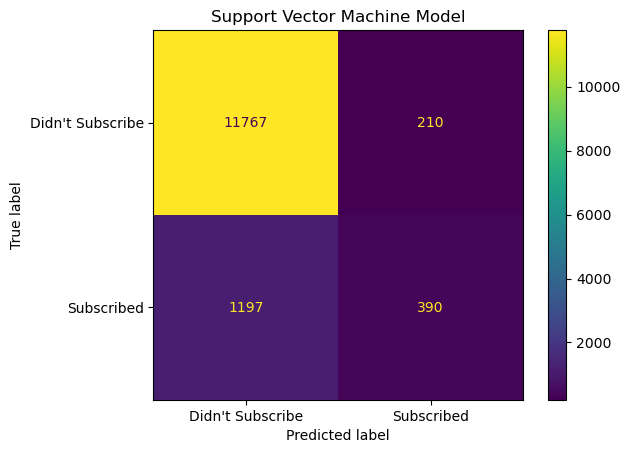

In [90]:
ConfusionMatrixDisplay.from_predictions(
    y_true = y_test, 
    y_pred = svc_predictions, 
    labels = ['no','yes'],
    display_labels=["Didn't Subscribe",'Subscribed']
)
plt.title('Support Vector Machine Model')

Note: as the best etimator uses the rbf (Radial Basis Function) kernel, we can't get the coefficients of the features. 

Since the rbf kernel does not tell us the weightage of each eature, let us fit a SVC model with linear kernel to get the feature weights

#### SVM - Linear Kernel

In [98]:
svm_linear_pipe = Pipeline([
    ('preprocessor', transformer),
    ('model', SVC(kernel='linear'))
])

In [99]:
%%time

svm_linear_pipe.fit(X_train, y_train)

CPU times: total: 10.2 s
Wall time: 10.2 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['marital', 'default',
                                                   'housing', 'loan',
                                                   'poutcome']),
                                                 ('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[['entrepreneur',
                                                                              'management',
                                                                              'admin.',
                                                                              'self-employed',
                                                                              'retired',
                     

In [117]:
svm_linear_pipe.score(X_train, y_train)

0.8926280532119948

In [100]:
svc_linear_predictions = svm_linear_pipe.predict(X_test)
svc_linear_predictions

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [101]:
pos_label = 'yes'
svc_linear_precision, svc_linear_recall = precision_score(y_test, svc_linear_predictions, pos_label=pos_label), recall_score(y_test, svc_linear_predictions, pos_label=pos_label)
print(f'Decision Tree (precision, recall): ({svc_linear_precision},{svc_linear_recall})')

Decision Tree (precision, recall): (0.6584269662921348,0.18462507876496534)


Text(0.5, 1.0, 'Support Vector Machine (Linear Kernel) Model')

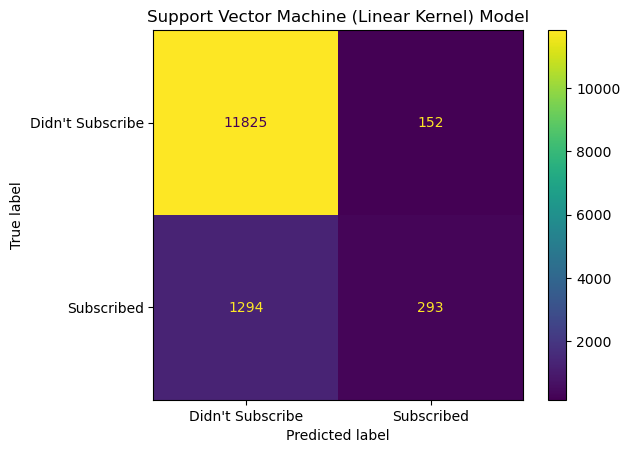

In [106]:
ConfusionMatrixDisplay.from_predictions(
    y_true = y_test, 
    y_pred = svc_linear_predictions, 
    labels = ['no','yes'],
    display_labels=["Didn't Subscribe",'Subscribed']
)
plt.title('Support Vector Machine (Linear Kernel) Model')

In [108]:
svm_linear_pipe['model'].coef_

array([[ 1.28384001e-05, -5.26806930e-05,  3.98422932e-05,
        -1.56397179e-04, -8.57551122e-05, -1.44061240e-04,
        -4.99980766e-01, -4.99853228e-01,  1.49993581e+00,
        -5.00101817e-01, -1.88359390e-05,  1.07046299e-05,
        -1.62774459e-05,  1.89185576e-04, -1.28735746e-05,
        -1.23837295e-05]])

In [109]:
# let us get the coefficients of the features used in the best estimator
svm_feature_weights = pd.DataFrame({
    'feature': tx_feature_names,
    'weight': svm_linear_pipe['model'].coef_[0]
})
svm_feature_weights['abs_weight'] = abs(svm_feature_weights['weight'])

svm_feature_weights.sort_values(by=['abs_weight'], ascending=False)

,feature,weight,abs_weight
8,poutcome_success,1.499936,1.499936
9,poutcome_unknown,-0.500102,0.500102
6,poutcome_failure,-0.499981,0.499981
7,poutcome_other,-0.499853,0.499853
13,duration,0.000189,0.000189
3,default_yes,-0.000156,0.000156
5,loan_yes,-0.000144,0.000144
4,housing_yes,-0.000086,0.000086
1,marital_married,-0.000053,0.000053
2,marital_single,0.000040,0.000040


### Results

In [37]:
res_dict = {
    'model': ['K-Nearest Neighbors', 'Logistic Regression', 'Decision Tree', 'SVM(rbf kernel)', 'SVM(Linear Kernel)'],
    'Average fit time (s)': [211, 26.6, 129, 187, 10.2],
    'best score': [0.8941131385230653, 0.8998640576478245, 0.9008752059590786, 0.8946819337850768, 0.8926280532119948],
    'precision': [0.5739130434782609, 0.6467532467532467, 0.6441102756892231, 0.65,0.6584269662921348],
    'recall': [0.332703213610586, 0.31379962192816635, 0.3238815374921235, 0.24574669187145556,0.18462507876496534]
}
results_df = pd.DataFrame(res_dict)
results_df

,model,Average fit time (s),best score,precision,recall
0,K-Nearest Neighbors,211.0,0.894113,0.573913,0.332703
1,Logistic Regression,26.6,0.899864,0.646753,0.313800
2,Decision Tree,129.0,0.900875,0.644110,0.323882
3,SVM(rbf kernel),187.0,0.894682,0.650000,0.245747
4,SVM(Linear Kernel),10.2,0.892628,0.658427,0.184625


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

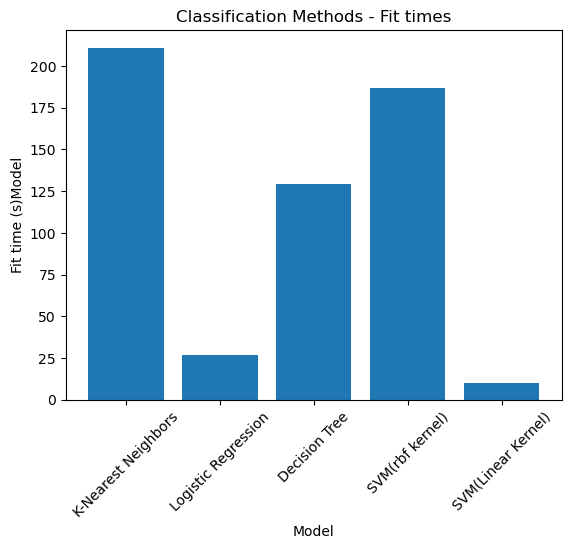

In [49]:
plt.bar(results_df['model'], results_df['Average fit time (s)'])
plt.xlabel('Model')
plt.ylabel('Fit time (s)Model')
plt.title("Classification Methods - Fit times")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

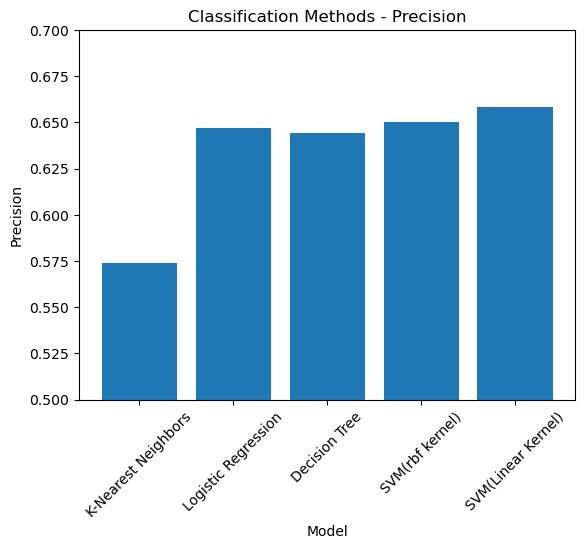

In [51]:
plt.bar(results_df['model'], results_df['precision'])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0.5,0.7)
plt.title("Classification Methods - Precision")
plt.xticks(rotation=45)